In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys, os

#sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [3]:
import cleaning_functions as clean
import plotting_functions as plot

Import data as a dataframe

In [4]:
df = pd.read_csv("../data/Week1_challenge_data_source.csv")

In [5]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


Before Cleaning the dataset, we explore what has been stored in it. The column names, how many data points, number of colum etc. All these questions needs to be answered

In [6]:
print("The data has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The data has 150001 rows and 55 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
fl_descp = pd.read_excel("../data/Field_Descriptions.xlsx")
fl_descp.head(5)

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)


# 1. Cleaning The Data
## 1.1. Handling Missing Values

In [9]:
# see missing values as percentages

miss_df = clean.missing_values_table(df)
miss_df

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.80,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.60,float64
Nb of sec with 125000B < Vol DL,97538,65.00,float64
TCP UL Retrans. Vol (Bytes),96649,64.40,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.40,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.90,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.90,float64
TCP DL Retrans. Vol (Bytes),88146,58.80,float64
HTTP UL (Bytes),81810,54.50,float64
HTTP DL (Bytes),81474,54.30,float64


We see that some columns are missing a lot of values. Handeling missing values depend on:
1. percentage of missing values
2. type of values
3. distribution of values

1. we drop columns missing > 50% of values

In [10]:
cols_to_drop = miss_df[miss_df['% of Total Values'] > 50].index.to_list()

df_clean = df.drop(cols_to_drop, axis = 1)

2. Columns that include unique identifiers, like 'Bearer Id', 'IMSI', 'IMEI'. Rows that have missing ids are useless and should be droped

In [11]:
fl_descp[fl_descp['Fields'].apply(lambda x: x in ['bearer id', 'IMSI', 'IMEI', "MSISDN/Number"])]

,Fields,Description
0,bearer id,xDr session identifier
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [12]:
df_clean = df_clean.dropna(subset=['Bearer Id', 'IMSI', 'IMEI', "MSISDN/Number"])

# update what are the missing values in this new dataframe df_clean

miss_df = clean.missing_values_table(df_clean)
miss_df

Your selected dataframe has 45 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Avg RTT DL (ms),27636,18.60,float64
Avg RTT UL (ms),27616,18.60,float64
Nb of sec with Vol UL < 1250B,768,0.50,float64
UL TP < 10 Kbps (%),767,0.50,float64
10 Kbps < UL TP < 50 Kbps (%),767,0.50,float64
50 Kbps < UL TP < 300 Kbps (%),767,0.50,float64
UL TP > 300 Kbps (%),767,0.50,float64
Nb of sec with Vol DL < 6250B,713,0.50,float64
DL TP < 50 Kbps (%),712,0.50,float64
50 Kbps < DL TP < 250 Kbps (%),712,0.50,float64


3. for the remaining columns, we can use the mode or the median to fill the missing values, depending on the data types.
    - mode: for object data type (column "Last Location Name")
    - median: for numeric data types (all columns except "Last Location Name")

In [13]:
cols_to_fill = miss_df[miss_df['Missing Values'] > 0].index.to_list()
cols_to_fill

['Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Nb of sec with Vol UL < 1250B',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Nb of sec with Vol DL < 6250B',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'Last Location Name']

In [14]:
for col in cols_to_fill:
    if col == "Last Location Name":
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [15]:
# Now we have no missing data.
miss_df = clean.missing_values_table(df_clean)

Your selected dataframe has 45 columns.
There are 0 columns that have missing values.


## 1.2. Fixing DataTypes

In [16]:
# Columns 'Start' + 'Start ms' can be combined to make up the date-time in milliseconds
# Columns 'End' + 'End ms' can be combined to make up the date-time in milliseconds

df_clean['Start_dt'] = pd.to_datetime(df_clean['Start']) + pd.to_timedelta(df_clean['Start ms'], unit= 'ms')
df_clean['End_dt'] = pd.to_datetime(df_clean['End']) + pd.to_timedelta(df_clean['End ms'], unit= 'ms')

In [17]:
# We can now drop the columns 'Start', 'Start ms', 'End', 'End ms'

df_clean = df_clean.drop(['Start', 'Start ms', 'End', 'End ms'], axis=1)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       148506 non-null  float64       
 1   Dur. (ms)                       148506 non-null  float64       
 2   IMSI                            148506 non-null  float64       
 3   MSISDN/Number                   148506 non-null  float64       
 4   IMEI                            148506 non-null  float64       
 5   Last Location Name              148506 non-null  object        
 6   Avg RTT DL (ms)                 148506 non-null  float64       
 7   Avg RTT UL (ms)                 148506 non-null  float64       
 8   Avg Bearer TP DL (kbps)         148506 non-null  float64       
 9   Avg Bearer TP UL (kbps)         148506 non-null  float64       
 10  DL TP < 50 Kbps (%)             148506 non-null  float64

## 1.3. Save The Clean Data

In [19]:
# We store the cleaned data in a 'csv' file

# df_clean.to_csv('../data/clean_tellco_data.csv',index=False)

# 2. Exploring The Data
## 2.1. Preliminary Insights 

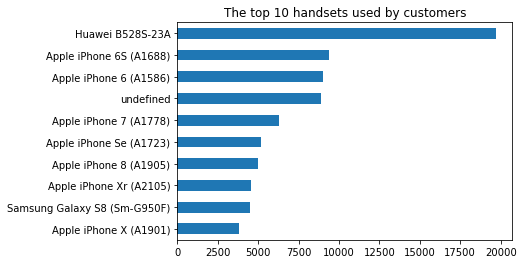

In [20]:
# Top 10 handsets used by the customers.
ax= df_clean['Handset Type'].value_counts()[:10].plot(kind='barh')
ax.invert_yaxis()
ax.set_title('The top 10 handsets used by customers')
plt.show()

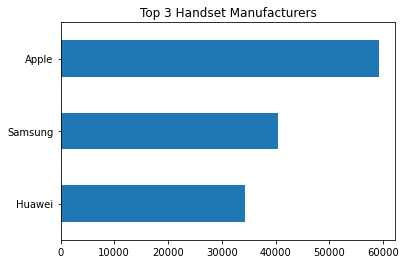

In [21]:
# 3 Top Handset Manufacturers

ax= df_clean['Handset Manufacturer'].value_counts()[:3].plot(kind='barh')
ax.invert_yaxis()
ax.set_title('Top 3 Handset Manufacturers')
plt.show()

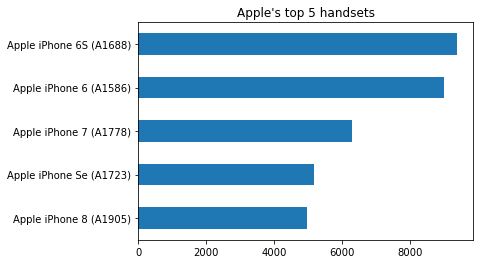

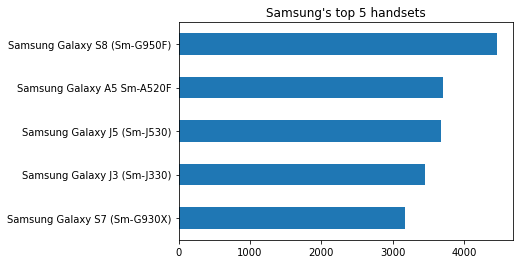

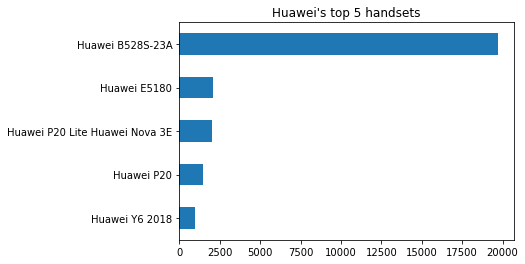

In [22]:
# The top 5 handsets per top 3 handset manufacturer

top_manufacturers = df_clean['Handset Manufacturer'].value_counts()[:3].index.to_list()

for x in top_manufacturers:
    ax = df_clean[df_clean['Handset Manufacturer']==x]['Handset Type'].value_counts()[:5].plot(kind='barh')
    ax.invert_yaxis()
    ax.set_title('{}\'s top 5 handsets'.format(x))
    plt.show()

In [23]:
## 2.2. Univariate Summary Statistics
# identity_cols = ['MSISDN/Number','IMSI', 'IMEI', 'Bearer Id']

# df_clean.drop(identity_cols, axis=1).describe()

## 2.2. Aggregate Data Per User

We choose to identify user by their phone numbers (MSISDN/Number)

In [24]:
# Column Dur. (ms) is actually the duration in seconds. Dur. (s)

# there are issues with the duration columns:
#    1. (df_clean['End_dt'] - df_clean['Start_dt']).dt.total_seconds() != df_clean['Dur. (s)'] 
#    2. (df_clean['End_dt'] - df_clean['Start_dt']).dt.total_seconds()*1000 != df_clean['Dur. (ms).1'] 
#    3. df_clean['Dur. (ms).1'] is NOT always bigger than  
#                   df_clean['Activity Duration DL (ms)'] + df_clean['Activity Duration UL (ms)']

In [25]:
df_clean.columns

Index(['Bearer Id', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (

In [59]:
# We create a new DataFrame with the relevant data for user overview analysis

relevant_cols = ['MSISDN/Number', 'Bearer Id']

df_user_overview = pd.DataFrame(data= df_clean[relevant_cols].values, columns=['user_id', 'session_id'])

In [60]:
#Add duration in seconds = 1000 ms
df_user_overview['duration (s)'] = df_clean['Dur. (ms).1']/1000

#Add DL + UL data volume in MB = 10^6 Bytes
df_user_overview['Total DL+UL (MB)'] = (df_clean['Total DL (Bytes)'] 
                                        + df_clean['Total UL (Bytes)'])/10**6
df_user_overview['Social Media DL+UL (MB)'] = (df_clean['Social Media DL (Bytes)'] 
                                               + df_clean['Social Media UL (Bytes)'])/10**6
df_user_overview['Google DL+UL (MB)'] = (df_clean['Google DL (Bytes)'] + df_clean['Google UL (Bytes)'])/10**6
df_user_overview['Email DL+UL (MB)'] = (df_clean['Email DL (Bytes)'] + df_clean['Email UL (Bytes)'])/10**6
df_user_overview['Youtube DL+UL (MB)'] = (df_clean['Youtube DL (Bytes)'] + df_clean['Youtube UL (Bytes)'])/10**6
df_user_overview['Netflix DL+UL (MB)'] = (df_clean['Netflix DL (Bytes)'] + df_clean['Netflix UL (Bytes)'])/10**6
df_user_overview['Gaming DL+UL (MB)'] = (df_clean['Gaming DL (Bytes)'] + df_clean['Gaming UL (Bytes)'])/10**6
df_user_overview['Other DL+UL (MB)'] = (df_clean['Other DL (Bytes)'] + df_clean['Other UL (Bytes)'])/10**6

In [61]:
df_user_overview.head(3)

,user_id,session_id,duration (s),Total DL+UL (MB),Social Media DL+UL (MB),Google DL+UL (MB),Email DL+UL (MB),Youtube DL+UL (MB),Netflix DL+UL (MB),Gaming DL+UL (MB),Other DL+UL (MB)
0,"33,664,962,239.00","13,114,483,460,844,900,352.00","1,823,652.89",345.63,1.57,2.91,3.70,18.36,17.86,292.43,180.56
1,"33,681,854,413.00","13,114,483,482,878,900,224.00","1,365,104.37",707.19,1.93,4.41,0.94,39.36,35.57,609.92,541.96
2,"33,760,627,129.00","13,114,483,484,080,500,736.00","1,361,762.65",307.69,1.73,10.23,3.36,34.43,23.75,229.98,414.91


In [62]:
# Aggregate Data by user

user_grouped = df_user_overview.groupby('user_id')
user_grouped

In [63]:
# Aggregate for total Number of sessions,  duration, total data volume and total data volume for each applications

user = user_grouped.agg({'session_id': 'count', 'duration (s)': 'sum', 'Total DL+UL (MB)': 'sum', 
                         'Social Media DL+UL (MB)': 'sum', 'Google DL+UL (MB)': 'sum', 'Email DL+UL (MB)': 'sum',
                        'Youtube DL+UL (MB)': 'sum', 'Netflix DL+UL (MB)': 'sum', 'Gaming DL+UL (MB)': 'sum',
                        'Other DL+UL (MB)': 'sum'})

In [64]:
user.rename(columns ={'session_id': 'num of sessions'}, inplace= True)

In [65]:
user.head(4)

,num of sessions,duration (s),Total DL+UL (MB),Social Media DL+UL (MB),Google DL+UL (MB),Email DL+UL (MB),Youtube DL+UL (MB),Netflix DL+UL (MB),Gaming DL+UL (MB),Other DL+UL (MB)
user_id,,,,,,,,,,
"33,601,001,722.00",1,"86,399.99",245.15,3.41,3.83,3.04,16.64,26.17,184.66,727.17
"33,601,001,754.00",1,"261,002.27",707.32,3.05,4.41,1.66,11.53,22.32,651.82,323.33
"33,601,002,511.00",1,"113,693.38",336.37,1.49,4.40,1.91,44.30,13.80,265.51,461.09
"33,601,007,832.00",1,"30,494.82",555.28,2.83,7.16,1.32,40.39,32.89,455.01,141.96


### 2.2 Univariate Summary Statistics

In [66]:
user.describe()

,num of sessions,duration (s),Total DL+UL (MB),Social Media DL+UL (MB),Google DL+UL (MB),Email DL+UL (MB),Youtube DL+UL (MB),Netflix DL+UL (MB),Gaming DL+UL (MB),Other DL+UL (MB)
count,"106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00"
mean,1.39,"145,352.36",684.81,2.52,10.78,3.12,31.27,31.25,594.45,592.99
std,0.81,"141,142.72",493.87,1.91,7.53,2.23,21.29,21.33,451.58,451.75
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,"68,512.92",349.98,1.19,5.84,1.64,18.37,18.27,279.63,278.10
50%,1.00,"103,011.80",612.18,2.28,9.53,2.77,26.57,26.57,537.17,535.28
75%,2.00,"174,722.69",854.74,3.29,13.16,3.84,37.70,37.79,774.93,773.33
max,18.00,"3,321,727.74","9,479.57",35.24,148.93,48.11,412.54,382.14,"8,323.82","9,639.31"


### 2.3 Graphical Univariate Analysis

,num of sessions,duration (s),Total DL+UL (MB),Social Media DL+UL (MB),Google DL+UL (MB),Email DL+UL (MB),Youtube DL+UL (MB),Netflix DL+UL (MB),Gaming DL+UL (MB),Other DL+UL (MB)
user_id,,,,,,,,,,
"33,601,001,722.00",1,"86,399.99",245.15,3.41,3.83,3.04,16.64,26.17,184.66,727.17
"33,601,001,754.00",1,"261,002.27",707.32,3.05,4.41,1.66,11.53,22.32,651.82,323.33
"33,601,002,511.00",1,"113,693.38",336.37,1.49,4.40,1.91,44.30,13.80,265.51,461.09
"33,601,007,832.00",1,"30,494.82",555.28,2.83,7.16,1.32,40.39,32.89,455.01,141.96
"33,601,008,617.00",2,"46,777.91",582.19,0.71,15.82,4.11,49.55,58.37,425.62,817.12
...,...,...,...,...,...,...,...,...,...,...
"33,789,996,170.00",1,"13,067.00",307.33,0.56,9.43,3.58,37.47,40.18,203.36,252.58
"33,789,997,247.00",1,"172,859.17",687.23,0.99,3.86,3.75,21.06,21.68,623.70,492.27
"3,197,020,876,596.00",1,"25,133.78",804.89,0.73,12.54,0.21,34.03,26.46,726.54,796.55


# Ploting

In [42]:
df_clean.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (

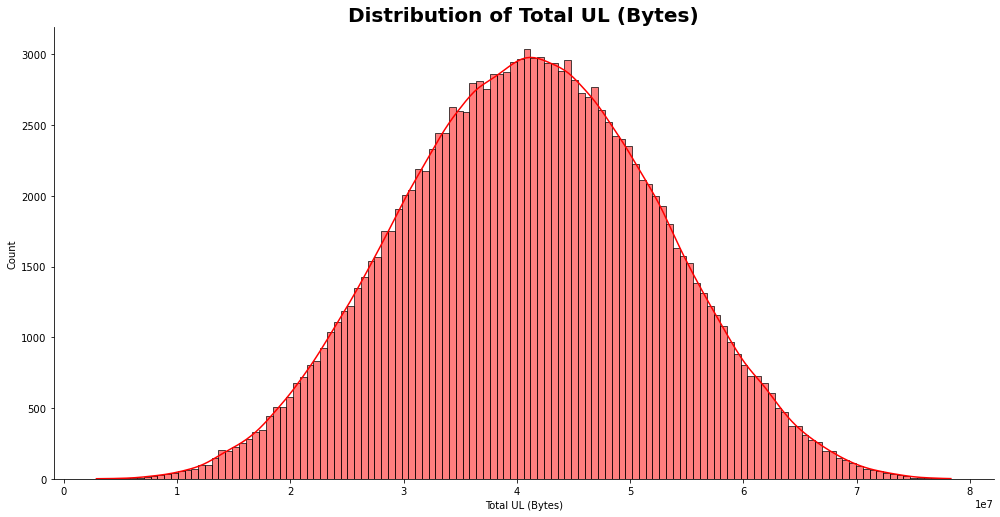

In [43]:
pltf.plot_hist(df_clean, 'Total UL (Bytes)', 'red',"totalUL.jpg")
#plt.savefig("totalUL.jpg")

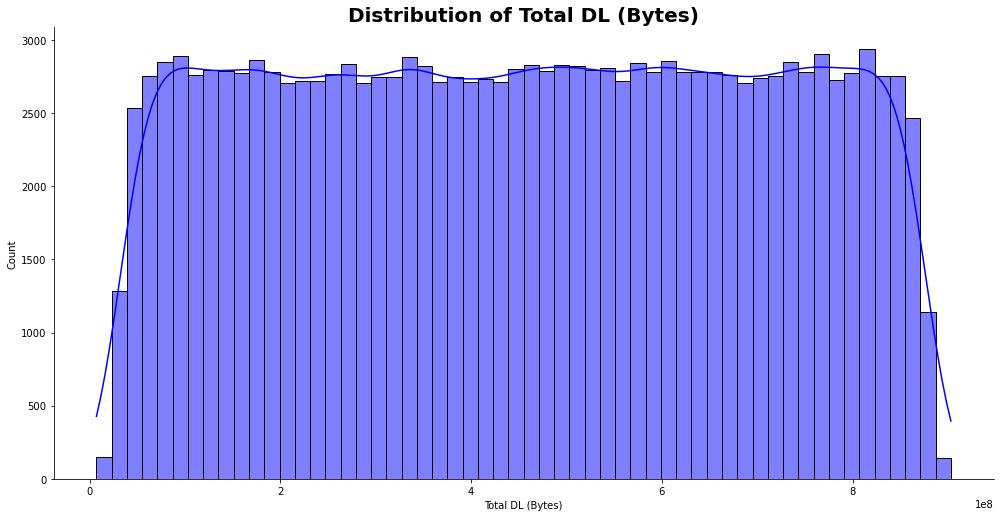

In [44]:
pltf.plot_hist(df_clean, 'Total DL (Bytes)', 'blue',"totalDL.jpg")
#plt.savefig("totalDL.jpg")

In [46]:
df_clean['Start'].min()

Timestamp('2019-04-04 12:01:00')

In [47]:
df_clean['Start'].max()

Timestamp('2019-04-29 07:28:00')